In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("placement.csv")

In [94]:
df = df[["cgpa","iq","placement"]]

In [95]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# STEPS OF MACHINE LEARNING

0 = preprocess + EDA +FeatureScaling

1 = Extract Input and Output Columns

2 = Train Test Split

3 = Train the model

4 = Evalute Model

5 = Deploy the model

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [97]:
colors = {1: "green", 0: "red"}


Scatter Plot Between iq and Cgpa

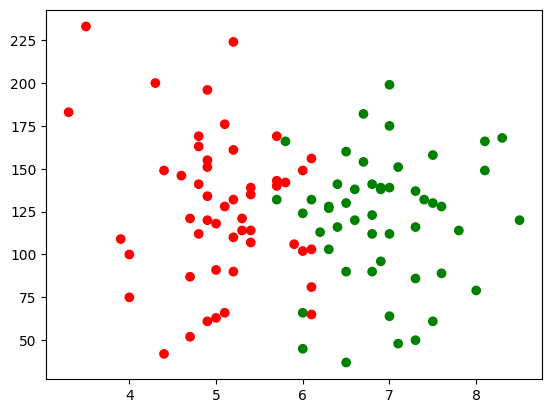

In [98]:
scatter = plt.scatter(df["cgpa"],df["iq"],c = df["placement"].map(colors),label = df["placement"])

# Seperating Input and Output Variables

In [99]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

Now spliting X and Y for training and test purpose


In [100]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.1)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
xtrain = scaler.fit_transform(xtrain)

In [104]:
xtest = scaler.fit_transform(xtest)

In [105]:
xtest

array([[-0.97448276,  0.59240085],
       [ 0.45858012,  0.88860127],
       [ 0.3630426 , -2.39922342],
       [-0.68787018,  0.85898123],
       [-0.59233266, -1.03670148],
       [-0.21018256, -0.5627808 ],
       [-1.16555781,  0.68126097],
       [ 2.36933063,  0.68126097],
       [ 0.84073022,  0.11848017],
       [-0.40125761,  0.17772025]])

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
clf = LogisticRegression()

In [108]:
#Model Training
clf.fit(xtrain,ytrain)

LogisticRegression()

In [109]:
#Model Prediction
y_pred = clf.predict(xtest)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(ytest,y_pred)

0.9

Seeing how it calculating this score

In [112]:
from mlxtend.plotting import plot_decision_regions


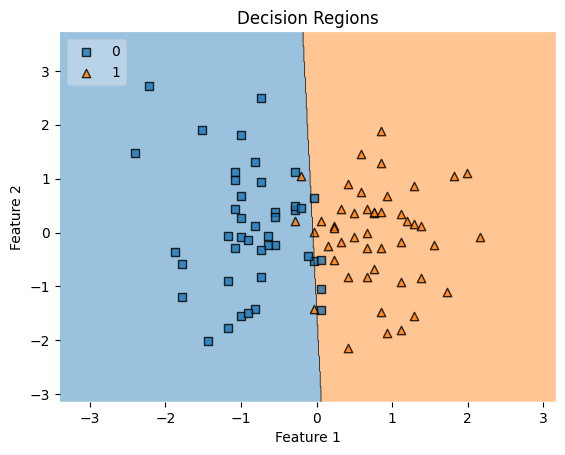

In [113]:
y_train_numpy = ytrain.values

# Plot decision regions
plot_decision_regions(xtrain, y_train_numpy, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')

# Show the plot
plt.show()

In [114]:
Comparedf = pd.DataFrame(ytest)

In [115]:
Comparedf["ypred"] = y_pred

In [116]:
Comparedf

,placement,ypred
39,0,0
8,0,1
10,1,1
76,0,0
25,0,0
81,0,0
88,0,0
37,1,1
57,1,1
19,0,0


In [117]:
import pickle

In [118]:
pickle.dump(clf,open('model.pkl','wb'))